# 4.2. Carnot Cycle

## Overview

Under construction...

## The Cycle

In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.constants import R as R_J_per_K_mol
from labellines import labelLines
from myst_nb import glue

# Constants
R = R_J_per_K_mol / 1000  # J/K/mol to L bar per K mol

# Isothermal Process for Ideal Gas
def P_isothermal_ideal_gas(V, T, n):
    return n * R * T / V

# Adiabatic Process for Ideal Gas
def P_adiabatic_ideal_gas(V, V1, P1, gamma=5/3):
    return P1 * (V1 / V) ** gamma

# Intersection of two pressure curves
def intersection(P1, P2, V):
    return V[np.argmin(np.abs(P1 - P2))]

# Plotting the Carnot Cycle
fig, axs = plt.subplots(1, 1, figsize=(4, 4))

# Calculate the pressure for each segment of the cycle
V = np.linspace(0.1, 5, 1000)  # L
T_hot = 298.15  # K
T_cold = 273.15  # K
n = 1  # mol
V_A = 0.5  # L
V_C = 1.0  # L
P_AB = P_isothermal_ideal_gas(V, T_hot, n)
P_DA = P_adiabatic_ideal_gas(V, V_A, P_isothermal_ideal_gas(V_A, T_hot, n))
P_CD = P_isothermal_ideal_gas(V, T_cold, n)
P_BC = P_adiabatic_ideal_gas(V, V_C, P_isothermal_ideal_gas(V_C, T_cold, n))

# Plot the segments
isotherm_1 = axs.plot(V, P_AB, "r-", label=r'A$\rightarrow$B isothermal expansion ($T_{\text{hot}}$)')
adiabat_1 = axs.plot(V, P_BC, "k:", label=r'B$\rightarrow$C adiabatic expansion', zorder=-10)
isotherm_2 = axs.plot(V, P_CD, "b-", label=r'C$\rightarrow$D isothermal compression ($T_{\text{cold}}$)')
adiabat_2 = axs.plot(V, P_DA, "k--", label=r'D$\rightarrow$A adiabatic compression', zorder=-10)

# Label the segments
# labelLines(isotherm_1, xvals=[0.5], fontsize=10, color='r')
axs.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title="Steps")

# Mark the points
axs.plot(V_A, P_isothermal_ideal_gas(V_A, T_hot, n), "ks", markerfacecolor='none')
axs.annotate("A", (V_A, P_isothermal_ideal_gas(V_A, T_hot, n)), textcoords="offset points", xytext=(10, 10), ha='center', va='center')
V_B = intersection(P_AB, P_BC, V)
P_B = P_isothermal_ideal_gas(V_B, T_hot, n)
axs.plot(V_B, P_B, "ks", markerfacecolor='none')
axs.annotate("B", (V_B, P_B), textcoords="offset points", xytext=(10, 10), ha='center', va='center')
V_C = intersection(P_BC, P_CD, V)
P_C = P_isothermal_ideal_gas(V_C, T_cold, n)
axs.plot(V_C, P_C, "ks", markerfacecolor='none')
axs.annotate("C", (V_C, P_C), textcoords="offset points", xytext=(-10, -10), ha='center', va='center')
V_D = intersection(P_CD, P_DA, V)
P_D = P_isothermal_ideal_gas(V_D, T_cold, n)
axs.plot(V_D, P_D, "ks", markerfacecolor='none')
axs.annotate("D", (V_D, P_D), textcoords="offset points", xytext=(-10, -10), ha='center', va='center')

axs.set_xlim(0.4, 1.1)
axs.set_ylim(2, 6)

axs.set_xticks([V_A, V_B, V_C, V_D])
axs.set_xticklabels([r"$V_A$", r"$V_B$", r"$V_C$", r"$V_D$"])

P_A = P_isothermal_ideal_gas(V_A, T_hot, n)
axs.set_yticks([P_A, P_B, P_C, P_D])
axs.set_yticklabels([r"$P_A$", r"$P_B$", r"$P_C$", r"$P_D$"])

x = (V_B + V_D) / 2
y = (P_B + P_D) / 2
axs.annotate("system\nabsorbs\nheat", (x, y - 0.1), textcoords="offset points", xytext=(50, 50), ha='center', va='center', fontsize=10, color='r', arrowprops=dict(facecolor='r', shrink=0.05, edgecolor='w', width=2, headwidth=8, headlength=8))
axs.annotate("system\nreleases\nheat", (x, y - 0.1), textcoords="offset points", xytext=(-50, -50), ha='center', va='center', fontsize=10, color='b', arrowprops=dict(facecolor='b', shrink=0.05, edgecolor='w', width=2, headwidth=8, headlength=8))

axs.grid()

glue("carnot_cycle", fig, display=False)
plt.close(fig)

```{glue:figure} carnot_cycle
:figwidth: 100%
:align: center

The Carnot cycle for an ideal gas. The isothermal expansion and compression curves follow Boyle's law, while the adiabatic expansion and compression curves follow the adiabatic equation, which is a steeper curve than the isothermal curves.
```

## How to Operate a Carnot Cycle/Engine

$V_{\text{A}}, P_{\text{A}}$
$V_{\text{B}}, P_{\text{B}}$
$V_{\text{C}}, P_{\text{C}}$
$V_{\text{D}}, P_{\text{D}}$


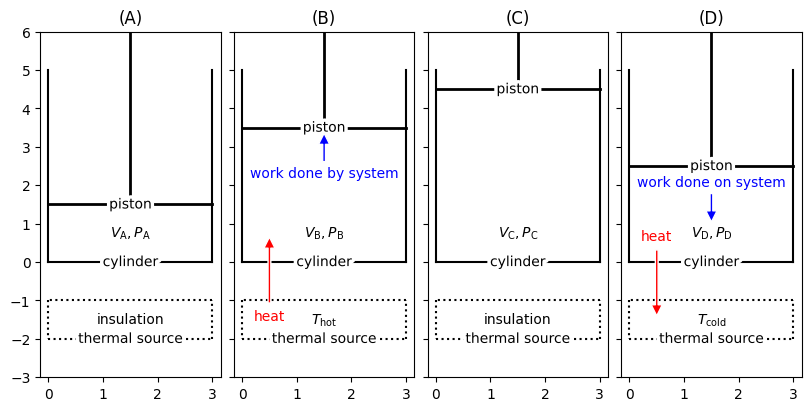

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.constants import R as R_J_per_K_mol
from labellines import labelLines
from myst_nb import glue

fig, axs = plt.subplot_mosaic([[0, 1, 2, 3]], figsize=(8, 4), constrained_layout=True, sharex=True, sharey=True)

axs[0].set_title('(A)')
axs[1].set_title('(B)')
axs[2].set_title('(C)')
axs[3].set_title('(D)')

piston_height = [1.5, 3.5, 4.5, 2.5]
step = ["A", "B", "C", "D"]
for i in range(4):
    # Cylinder
    axs[i].plot([0, 0], [5, 0], 'k-')
    cylinder = axs[i].plot([0, 3], [0, 0], 'k-',label='cylinder')
    axs[i].plot([3, 3], [0, 5], 'k-')
    labelLines(cylinder, xvals=[1.5], fontsize=10, color='k')

    # Thermal source
    axs[i].plot([0, 0], [-1, -2], 'k:')
    thermal_source = axs[i].plot([0, 3], [-2, -2], 'k:',label='thermal source')
    axs[i].plot([3, 3], [-2, -1], 'k:')
    axs[i].plot([3, 0], [-1, -1], 'k:')
    labelLines(thermal_source, xvals=[1.5], fontsize=10, color='k')
    if i == 0:
        axs[i].text(1.5, -1.5, 'insulation', fontsize=10, ha='center', va='center')
    if i == 1:
        axs[i].text(1.5, -1.5, r'$T_{\text{hot}}$', fontsize=10, ha='center', va='center')
    if i == 2:
        axs[i].text(1.5, -1.5, 'insulation', fontsize=10, ha='center', va='center')
    if i == 3:
        axs[i].text(1.5, -1.5, r'$T_{\text{cold}}$', fontsize=10, ha='center', va='center')

    # Piston
    axs[i].plot([1.5, 1.5], [piston_height[i], 6], 'k-', lw=2)
    piston = axs[i].plot([0, 3], [piston_height[i], piston_height[i]], 'k-', lw=2, label='piston')
    labelLines(piston, xvals=[1.5], fontsize=10, color='k')

    # P, V labels
    label = '$V_{\\text{' + step[i] + '}}, P_{\\text{' + step[i] + '}}$'
    print(label)
    axs[i].text(1.5, 0.75, label, fontsize=10, ha='center', va='center')

    # Heat transfer
    if i == 1:
        axs[i].annotate("heat", (0.5, 0.75), textcoords="offset points", xytext=(0, -60), ha='center', va='center', fontsize=10, color='r', arrowprops=dict(facecolor='r', shrink=0.05, edgecolor='w', width=2, headwidth=8, headlength=8))
    if i == 3:
        axs[i].annotate("heat", (0.5, -1.5), textcoords="offset points", xytext=(0, 60), ha='center', va='center', fontsize=10, color='r', arrowprops=dict(facecolor='r', shrink=0.05, edgecolor='w', width=2, headwidth=8, headlength=8))
    
    # Work done
    if i == 1:
        axs[i].annotate("work done by system", (1.5, piston_height[i] - 0.1), textcoords="offset points", xytext=(0, -30), ha='center', va='center', fontsize=10, color='b', arrowprops=dict(facecolor='b', shrink=0.05, edgecolor='w', width=2, headwidth=8, headlength=8))
    if i == 3:
        axs[i].annotate("work done on system", (1.5, piston_height[i] - 1.5), textcoords="offset points", xytext=(0, 30), ha='center', va='center', fontsize=10, color='b', arrowprops=dict(facecolor='b', shrink=0.05, edgecolor='w', width=2, headwidth=8, headlength=8))

    # Axis settings
    axs[i].set_ylim(-3, 6)

plt.show()